<a href="https://colab.research.google.com/github/gchn24/DS-Notes/blob/main/Day_177_RandomForests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

!gdown 16KtxSt_QEGQvfluEaMls5cCHPwhRXgCk
!gdown 19L3rYatfhbBL1r5MHrv-p_oM2wlvrhqk
!gdown 1OHLKJwA3qZopKPvlKoRldM6BvA1A4dYF
!gdown 1N7O_fWCTJLu8SIa_paKcDEzllgpMk8sK
!gdown 12Bh2AN8LcZAlg20ehpQrEWccUDaSdsOG

import pickle
# Load data (deserialize)
with open('preprocessed_X_sm.pickle', 'rb') as handle:
    X_train = pickle.load(handle)

with open('X_test.pickle', 'rb') as handle:
    X_test = pickle.load(handle)

with open('y_sm.pickle', 'rb') as handle:
    y_train = pickle.load(handle)

with open('y_test.pickle', 'rb') as handle:
    y_test = pickle.load(handle)

Downloading...
From: https://drive.google.com/uc?id=16KtxSt_QEGQvfluEaMls5cCHPwhRXgCk
To: /content/HR-Employee-Attrition.csv
100% 228k/228k [00:00<00:00, 3.94MB/s]
Downloading...
From: https://drive.google.com/uc?id=19L3rYatfhbBL1r5MHrv-p_oM2wlvrhqk
To: /content/preprocessed_X_sm.pickle
100% 534k/534k [00:00<00:00, 5.53MB/s]
Downloading...
From: https://drive.google.com/uc?id=1OHLKJwA3qZopKPvlKoRldM6BvA1A4dYF
To: /content/X_test.pickle
100% 111k/111k [00:00<00:00, 2.53MB/s]
Downloading...
From: https://drive.google.com/uc?id=1N7O_fWCTJLu8SIa_paKcDEzllgpMk8sK
To: /content/y_sm.pickle
100% 15.4k/15.4k [00:00<00:00, 39.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=12Bh2AN8LcZAlg20ehpQrEWccUDaSdsOG
To: /content/y_test.pickle
100% 9.49k/9.49k [00:00<00:00, 22.5MB/s]


In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=7, max_depth=4)
tree_clf.fit(X_train, y_train)

print("Train accuracy: {:.2f}".format(tree_clf.score(X_train, y_train)*100))
print("Test accuracy: {:.2f}".format(tree_clf.score(X_test, y_test)*100))

Train accuracy: 83.77
Test accuracy: 78.80


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_clf = RandomForestClassifier(n_estimators = 100,  max_depth = 4, random_state = 7)

In [ ]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, random_state=7)

In [ ]:
print("Train accuracy: {:.2f}".format(rf_clf.score(X_train, y_train)*100))
print("Test accuracy: {:.2f}".format(rf_clf.score(X_test, y_test)*100))

Train accuracy: 89.02
Test accuracy: 83.70


In [ ]:

from sklearn.model_selection import cross_validate

cv_acc_results = cross_validate(rf_clf, X_train, y_train, cv=10, scoring='accuracy', return_train_score=True)

print(f"K-Fold Accuracy Mean: \n Train: {cv_acc_results['train_score'].mean()*100:.2f} \n Validation: {cv_acc_results['test_score'].mean()*100:.2f}")
print(f"K-Fold Accuracy Std: \n Train: {cv_acc_results['train_score'].std()*100:.2f}, \n Validation: {cv_acc_results['test_score'].std()*100:.2f}")

K-Fold Accuracy Mean: 
 Train: 88.17 
 Validation: 85.72
K-Fold Accuracy Std: 
 Train: 0.99, 
 Validation: 8.55


In [ ]:
params = {
          'n_estimators' : [100,200,300,400],
          'max_depth' : [3,5,10],
          'max_features' : [8,9,10]
        }

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [ ]:
model = GridSearchCV(estimator = RandomForestClassifier(),
                     param_grid = params,
                     scoring = 'accuracy',
                     cv=3,
                     n_jobs = -1)

model.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 10], 'max_features': [8, 9, 10],
                         'n_estimators': [100, 200, 300, 400]},
             scoring='accuracy')

In [ ]:
print("Best params: ", model.best_params_)
print("Best score: ", model.best_score_)

Best params:  {'max_depth': 10, 'max_features': 8, 'n_estimators': 400}
Best score:  0.8982683982683982


In [ ]:
model.score(X_test, y_test)

0.8668478260869565

In [ ]:
from scipy.stats import uniform

In [ ]:
params = {
    'ccp_alpha' : uniform(0, 0.4)
}

In [ ]:
uniform(0, 0.4).rvs()

0.21569445959520955

In [ ]:
model = RandomizedSearchCV( RandomForestClassifier(max_depth= 10, max_features= 8, n_estimators= 400),
                    param_distributions = params,
                    scoring = 'accuracy',
                    cv = 3,
                    n_iter = 15,
                    n_jobs = -1
                    )

In [ ]:
model.fit(X_train, y_train)

RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(max_depth=10,
                                                    max_features=8,
                                                    n_estimators=400),
                   n_iter=15, n_jobs=-1,
                   param_distributions={'ccp_alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x787e0d2a0d00>},
                   scoring='accuracy')

In [ ]:
print("Best params: ", model.best_params_)
print("Best score: ", model.best_score_)

Best params:  {'ccp_alpha': 0.009443236641581976}
Best score:  0.8463203463203465


RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(max_depth=10,
                                                    max_features=8,
                                                    n_estimators=400),
                   n_iter=15, n_jobs=-1,
                   param_distributions={'ccp_alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x787e0d2a0d00>},
                   scoring='accuracy')

In [ ]:
final_model = RandomForestClassifier(max_depth= 10, max_features= 8, n_estimators= 400)
final_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features=8, n_estimators=400)

In [ ]:
final_model.feature_importances_

array([0.02571723, 0.02413141, 0.02422859, 0.01007553, 0.05501833,
       0.03027723, 0.00518959, 0.02677047, 0.03389766, 0.02334759,
       0.07001848, 0.03739834, 0.04877909, 0.03051642, 0.0141022 ,
       0.01489304, 0.0154379 , 0.00227975, 0.02803597, 0.06172291,
       0.02306059, 0.019672  , 0.01808743, 0.01770718, 0.01906454,
       0.01481665, 0.01802748, 0.00784118, 0.02047171, 0.00940023,
       0.00425675, 0.03429565, 0.02856193, 0.02318905, 0.05033389,
       0.10937599])

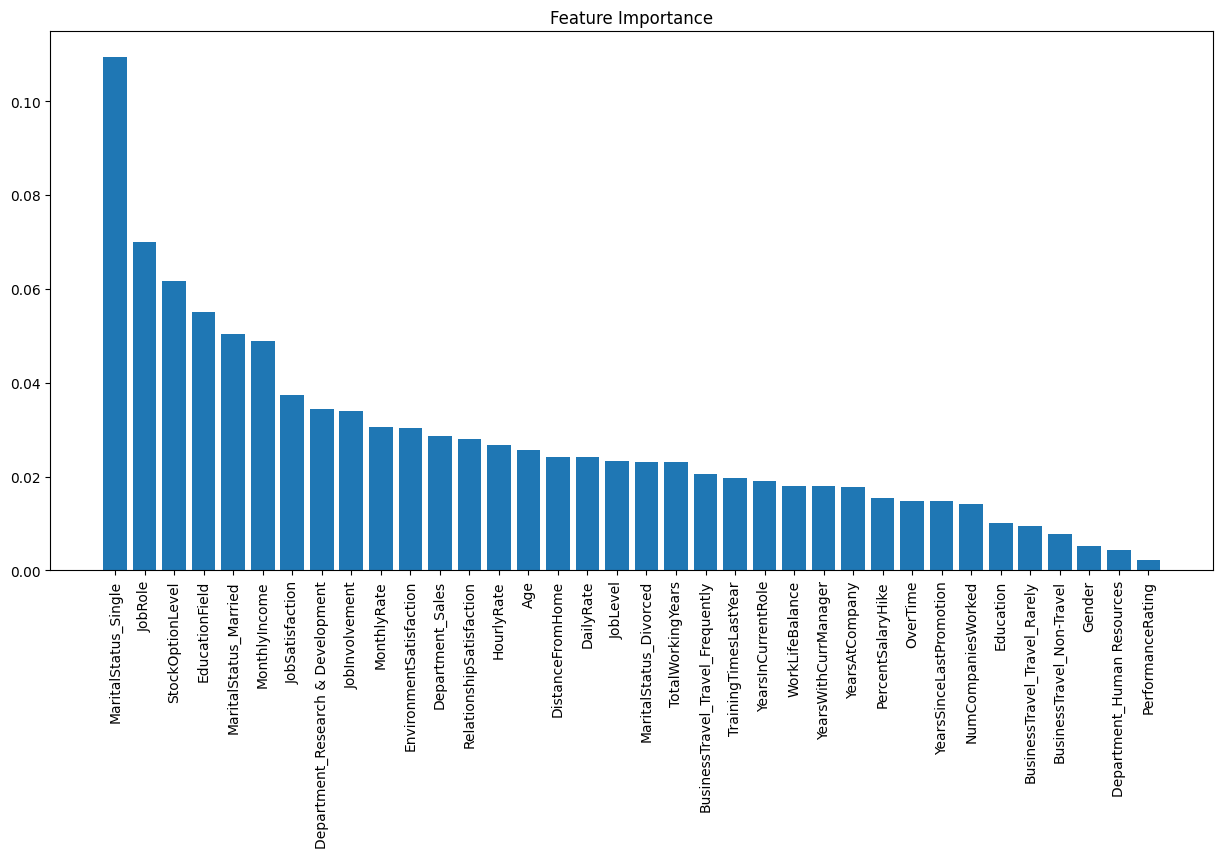

In [ ]:
import matplotlib.pyplot as plt

importances = final_model.feature_importances_

indices = np.argsort(importances)[::-1] # Sort feature importances in descending order
names = [X_train.columns[i] for i in indices] # Rearrange feature names so they match the sorted feature importances

plt.figure(figsize=(15, 7)) # Create plot
plt.title("Feature Importance") # Create plot title
plt.bar(range(X_train.shape[1]), importances[indices]) # Add bars
plt.xticks(range(X_train.shape[1]), names, rotation=90) # Add feature names as x-axis labels
plt.show() # Show plot